In [ ]:
!git clone https://github.com/LuisFMCuriel/FLFMic.git

To process find minimum error comparing WF data and FLF data

In [28]:
from metrics import calculate_error
from utils import resize_img, register_image, clean_outside_image
from tifffile import imread, imsave
import os

path = r"Z:\Luis\0 From Microscopes\1 Loli\FLMic\Fluorescence\MSB577\EI_extraction_20231017"
EI_stacks = imread(os.path.join(path, "worm_3_FLF_1_MMStack_Pos0.ome.tif"))
path = r"Z:\Luis\0 From Microscopes\1 Loli\FLMic\Fluorescence\MSB577\Rotation_img_projs_y"
Wf_stack = imread(os.path.join(path, "rotation_test_180.tif"))

In [56]:
EI_center = EI_stacks[90,:,:]
path = r"Z:\Luis\0 From Microscopes\1 Loli\FLMic\Fluorescence\MSB577\EI_extraction_20231017"
Wf_stack = imread(os.path.join(path, "worm_3_FLF_1_MMStack_Pos0.ome.tif"))
#EI_center = resize_img(Wf_stack[18,:,:], (256, 256))

In [57]:
def get compute_metrics_imageVSstack(EI_center, Wf_stack):
    ssim_list = []
    rmse_list = []
    for i in range(Wf_stack.shape[0]):
        img = resize_img(Wf_stack[i,:,:], (EI_center.shape[0], EI_center.shape[1]))
        matrix, img = register_image(EI_center, img)
        img = clean_outside_image(img)
        imsave(os.path.join(r"Z:\Luis\0 From Microscopes\1 Loli\FLMic\Fluorescence\MSB577\EI_extraction_20231017\test_comparison", "test_comparison_{}.tif".format(i)), img)
        ssim, rmse = calculate_error(img, EI_center)
        ssim_list.append(ssim)
        rmse_list.append(rmse)
    return ssim_list, rmse_list

In [60]:
def compute_metrics_imageVSstack(image, stack, path_save_imgs: str = "."):
    ssim_list = []
    rmse_list = []
    for i in range(stack.shape[0]):
        img = resize_img(stack[i,:,:], (image.shape[0], image.shape[1]))
        matrix, img = register_image(image, img)
        img = clean_outside_image(img)
        imsave(os.path.join(path_save_imgs, "test_comparison_{}.tif".format(i)), img)
        #imsave(os.path.join(r"Z:\Luis\0 From Microscopes\1 Loli\FLMic\Fluorescence\MSB577\EI_extraction_20231017\test_comparison", "test_comparison_{}.tif".format(i)), img)
        ssim, rmse = calculate_error(img, image)
        ssim_list.append(ssim)
        rmse_list.append(rmse)
    return ssim_list, rmse_list

In [61]:
ssim_heatmap = np.zeros((91,91))
rmse_heatmap = np.zeros((91,91))
for i in range(Wf_stack.shape[0]):
    single_img = Wf_stack[i]
    ssim, rmse = compute_metrics_imageVSstack(single_img, Wf_stack)
    ssim_heatmap[i,:] = ssim
    rmse_heatmap[i,:] = rmse

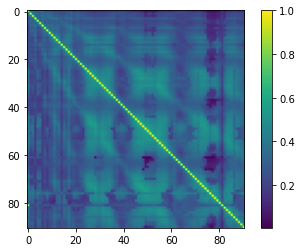

In [74]:
fig, ax = plt.subplots()
heatmap = ax.imshow(ssim_heatmap, cmap='viridis')
cbar = fig.colorbar(heatmap)
plt.show()
fig.savefig(os.path.join(r"Z:\Luis\0 From Microscopes\1 Loli\FLMic\Fluorescence\MSB577\EI_extraction_20231017", "SSIM_heatmap_EIcomparison.svg"))

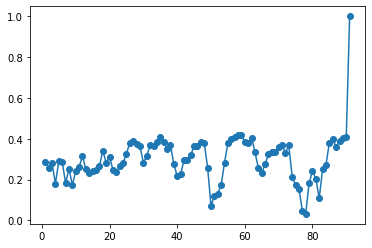

In [58]:
x = np.linspace(1,91, 91)
plt.scatter(x, ssim_list)
plt.plot(x, ssim_list)

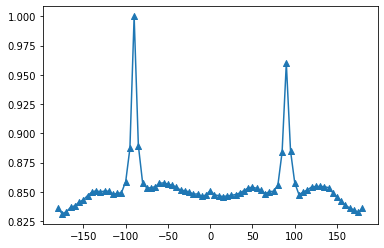

In [39]:
import matplotlib.pyplot as plt
import numpy as np

angles = np.linspace(-180, 180, 73)

plt.figure()
plt.scatter(angles, ssim_list, marker='^')
plt.plot(angles, ssim_list)
plt.savefig(os.path.join(r"Z:\Luis\0 From Microscopes\1 Loli\FLMic\Fluorescence\MSB577\EI_extraction_20231017\test_comparison", "plot_error_degrees.svg"))

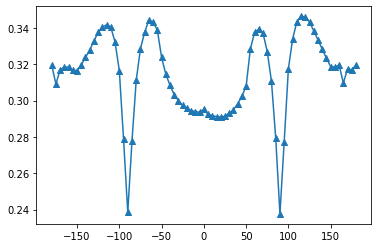

In [32]:
plt.figure()
plt.scatter(angles, rmse_list, marker='^')
plt.plot(angles, rmse_list)

In [40]:
print(max(ssim_list), ssim_list.index(max(ssim_list)))

0.9999971548917155 18


In [22]:
for i, j in enumerate(ssim_list):
    print(i, j, rmse_list[i], angles[i])

0 0.21790912623450062 0.31959108 -180.0
1 0.23332155177036681 0.3090808 -175.0
2 0.2155819444369074 0.3169114 -170.0
3 0.21205810192036872 0.3183236 -165.0
4 0.21341486479991614 0.31848037 -160.0
5 0.215283960998269 0.3165774 -155.0
6 0.21389455839506075 0.3164441 -150.0
7 0.21385382658011934 0.3196184 -145.0
8 0.21771361610596277 0.32377073 -140.0
9 0.2189145544342156 0.3277172 -135.0
10 0.22433922082850075 0.33284527 -130.0
11 0.22286712267854533 0.33747718 -125.0
12 0.2139227846174025 0.3404722 -120.0
13 0.19209401185321098 0.34163678 -115.0
14 0.15835765582491373 0.34036237 -110.0
15 0.10919912174874165 0.33202592 -105.0
16 0.039725784377778725 0.31652176 -100.0
17 -0.040554022511529425 0.2789393 -95.0
18 -0.06099893046539735 0.23846851 -90.0
19 -0.04265538547255802 0.27783945 -85.0
20 0.0268585235052455 0.31107348 -80.0
21 0.09598358229222836 0.32852396 -75.0
22 0.14732114815502356 0.33753493 -70.0
23 0.18437074253895616 0.3443639 -65.0
24 0.20038516632758777 0.3431045 -60.0
25 0.

For training

In [ ]:
from convolutional_approach import convolutional_model
from convolutional_model import *
import sys
import tensorflow as tf
import os

dir_path = os.path.dirname(os.path.realpath("."))
sys.path.insert(0, dir_path)
import io_helpers
import training_helpers

In [ ]:
#unet_model = get_decoder_network(input_size = (222, 222, 91), desired_output = 1725, strides_upsample = 2, output_channels = 1)
unet_model = get_unet_model_2d(input_size = (222, 222, 91), depth = 2, start_with_upsampling = True, attention = True, desired_output = 1725, strides_upsample = 2, output_channels = 1)

In [ ]:
tf.keras.utils.plot_model(unet_model, show_shapes = True)

In [ ]:
basepath = r"X:\LuisFel\0 FromMicroscopes\1 Loli\FLMic\Fluorescence\MB512_Reconstruction\Database\Mixed"
source_dir = r"FLF_cropped_partial_normalized"
target_dir = r"WF_cropped_for_network_partial_projection"
raw_data = io_helpers.from_folder(basepath = basepath, source_dir = source_dir, target_dir = target_dir)

In [ ]:
with open('FLF_normalized_data_70_samples.npy', 'wb') as f:
    np.save(f, raw_data[0])

In [ ]:
raw_data_WF = np.load("WF_normalized_data_70_samples.npy")
raw_data_WF[raw_data_WF < 10] = 0

In [ ]:
raw_data_FLF = np.load("FLF_normalized_data_70_samples.npy")

In [ ]:
training_helpers.prepare_model(unet_model)
training_helpers.train_network(unet_model, raw_data[0], raw_data[1], batch_size = 1, epochs = 100, validation_split = 0.1)